<a href="https://colab.research.google.com/github/jwoonge/ML-projects/blob/master/09/assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification for Multiple Categories using Pytorch
20141261 송제웅  
<hr>  

## 0. Import library
---
import library

In [3]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt

## 1. DownLoad and Normalize dataset (MNIST)
---  

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),
])

data_path = './MNIST'
data_train = datasets.MNIST(root = data_path, train = True, download = True, transform = transform)
data_test = datasets.MNIST(root = data_path, train = False, download = True, transform = transform)


## 2. Design NN Model
---
three fully connected layers with an activation function of sigmoid, LogSoftmax

In [5]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        )
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        )
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        )
        
    def forward(self, inputs):
        x = inputs.view(inputs.size(0), -1)
        x = self.classifier1(x)
        x = self.classifier2(x)
        out = self.classifier3(x)
        return out

## 3. Learning
---

In [6]:
def train(model, data_train, data_train_batch, optimizer, criterion, device='cuda'):
    n_batch = 0
    avg_loss = 0
    avg_acc = 0
    for batch_idx, (x, y) in enumerate(data_train_batch):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model.forward(x)
        loss = criterion(pred, y)
        avg_loss += loss.item()
        avg_acc += accuracy(pred, y)
        n_batch += 1

        loss.backward()
        optimizer.step()

    avg_loss /= n_batch
    avg_acc /= n_batch
    return avg_loss, avg_acc

def test(model, x, y, criterion):
    with torch.no_grad():
        pred = model.forward(x)
        loss = criterion(pred, y).item()
        acc = accuracy(pred, y)
    return loss, acc

def accuracy(pred, y):
    correct_cnt = 0
    num_sample = len(y)
    for i in range(num_sample):
        pred_class = pred[i].argmax()
        if y[i]==pred_class:
            correct_cnt += 1
    return 100 * correct_cnt / num_sample


In [7]:
def learn(model, data_train, data_test, criterion, optimizer, batch_size, epoch, device='cuda'):
    data_train_batch = torch.utils.data.DataLoader(data_train, batch_size, shuffle=True)
    test_x, test_y = data_test.test_data.view((10000,28*28)), data_test.test_labels
    test_x, test_y = torch.tensor(test_x, dtype=torch.float, device=device), test_y.to(device)
    loss_train_s = []; loss_test_s = []; acc_train_s = []; acc_test_s = []
    for i in range(epoch):
        loss_train, acc_train = train(model, data_train, data_train_batch, optimizer, criterion, device)
        loss_test, acc_test = test(model, test_x, test_y, criterion)
        loss_train_s.append(loss_train); loss_test_s.append(loss_test)
        acc_train_s.append(acc_train); acc_test_s.append(acc_test)
        print(i, loss_test, acc_test, loss_train, acc_train)
    return loss_train_s, loss_test_s, acc_train_s, acc_test_s
        

In [8]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
learning_rate = 0.1

## 4. Learn with batch size of 32
---

In [ ]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
loss_train_32, loss_test_32, acc_train_32, acc_test_32 = learn(classifier, data_train, data_test, criterion, optimizer, 32, 50)

## 5. Learn with batch size of 64

In [ ]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
loss_train_64, loss_test_64, acc_train_64, acc_test_64 = learn(classifier, data_train, data_test, criterion, optimizer, 64, 100)

## 6. Learn with batch size of 128

In [ ]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
loss_train_128, loss_test_128, acc_train_128, acc_test_128 = learn(classifier, data_train, data_test, criterion, optimizer, 128, 100)

---  
# RESULTS
---  
## 1. Plot the training and testing losses with a batch size of 32
---

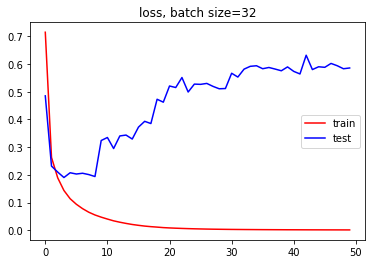

In [12]:
plt.plot(loss_train_32, color='r')
plt.plot(loss_test_32, color='b')
plt.title('loss, batch size=32')
plt.legend(['train','test'])
plt.show()

## 2. Plot the training and testing accuracies with a batch size of 32
---

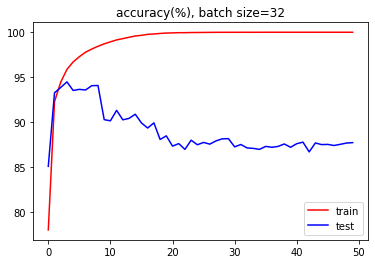

In [13]:
plt.plot(acc_train_32, color='r')
plt.plot(acc_test_32, color='b')
plt.title('accuracy(%), batch size=32')
plt.legend(['train','test'])
plt.show()

## 3. Plot the training and testing losses with a batch size of 64
---

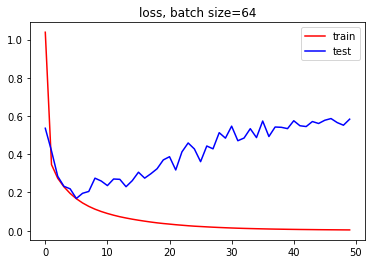

In [14]:
plt.plot(loss_train_64, color='r')
plt.plot(loss_test_64, color='b')
plt.title('loss, batch size=64')
plt.legend(['train','test'])
plt.show()

## 4. Plot the training and testing accuracies with a batch size of 64
---

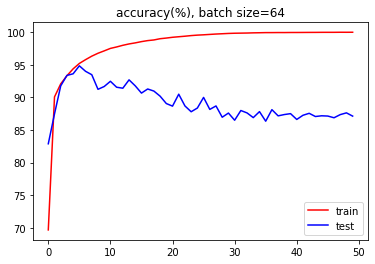

In [15]:
plt.plot(acc_train_64, color='r')
plt.plot(acc_test_64, color='b')
plt.title('accuracy(%), batch size=64')
plt.legend(['train','test'])
plt.show()

## 5. Plot the training and testing losses with a batch size of 128
---

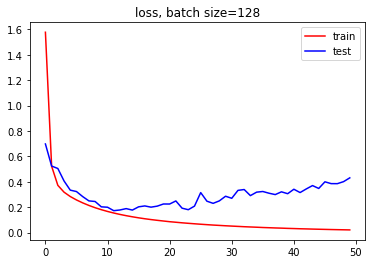

In [16]:
plt.plot(loss_train_128, color='r')
plt.plot(loss_test_128, color='b')
plt.title('loss, batch size=128')
plt.legend(['train','test'])
plt.show()

## 6. Plot the training and testing accuracies with a batch size of 128
---

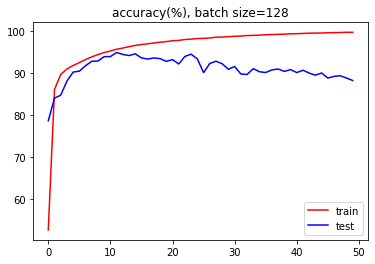

In [17]:
plt.plot(acc_train_128, color='r')
plt.plot(acc_test_128, color='b')
plt.title('accuracy(%), batch size=128')
plt.legend(['train','test'])
plt.show()

## 7. Print the loss at convergence with different mini-batch sizes
---

In [20]:
print('mini-batch size\t32\t64\t128')
print('training loss\t',round(loss_train_32[-1],3),'\t',round(loss_train_64[-1],3),'\t',round(loss_train_128[-1],3))
print('testing loss\t',round(loss_test_32[-1],3),'\t',round(loss_test_64[-1],3),'\t',round(loss_test_128[-1],3))

mini-batch size	32	64	128
training loss	 0.001 	 0.004 	 0.021
testing loss	 0.586 	 0.584 	 0.431


## 8. Print the accuracy at convergence with different mini-batch sizes
---

In [19]:
print('mini-batch size\t32\t64\t128')
print('training accuracy\t',round(acc_train_32[-1],2),'\t',round(acc_train_64[-1],2),'\t',round(acc_train_128[-1],2))
print('testing accuracy\t',round(acc_test_32[-1],2),'\t',round(acc_test_64[-1],2),'\t',round(acc_test_128[-1],2))

mini-batch size	32	64	128
training accuracy	 100.0 	 99.99 	 99.64
testing accuracy	 87.75 	 87.13 	 88.18
